In [8]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing

# Display plots inside Notebook
%matplotlib inline

In [9]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

In [10]:
#SpreadSheet Datafile name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 2 into DataFrame
ds2 = pd.read_excel(file, sheet_names = 'Dataset 2', index_col=0)

<h2>Filling missing values and Normalization</h2>

In [11]:
ds2.fillna(ds2.median(), inplace=True)
min_max_scaler = preprocessing.MinMaxScaler()
ds2[ds2.columns[5:90]] = min_max_scaler.fit_transform(ds2[ds2.columns[5:90]])
ds2_normalized = pd.DataFrame(ds2)
ds2_normalized.head()

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.0,0.894737,0.857143,0.875,0.584098,0.582996,...,0.95,0.827586,1.000000,0.80,1.000000,0.717413,0.733333,0.666667,0.875,0.857143
2,50,5.0,1,7,13.0,1.000000,0.914286,1.000,0.576394,0.582996,...,0.95,0.620690,0.733333,0.56,1.000000,0.717413,0.733333,0.722222,0.875,0.857143
3,41,5.0,1,7,13.0,0.894737,0.714286,0.750,0.564839,0.582996,...,0.95,0.758621,0.766667,0.72,1.000000,0.717413,0.666667,0.861111,0.875,0.857143
4,60,1.0,1,10,29.0,0.947368,0.571429,0.875,0.706530,0.757085,...,0.95,0.655172,0.666667,0.60,0.978947,0.767740,0.166667,1.000000,0.875,1.000000
5,22,1.0,1,10,29.0,0.947368,0.857143,0.750,0.668012,0.757085,...,0.95,0.137931,0.000000,0.60,0.978947,0.767740,0.833333,0.638889,0.750,0.942857


<h1>Plots</h1>

<h2>Plot feature “LM” with respect to “Head coach”</h2>

Text(0.5,1,'LM wrt Head Coach')

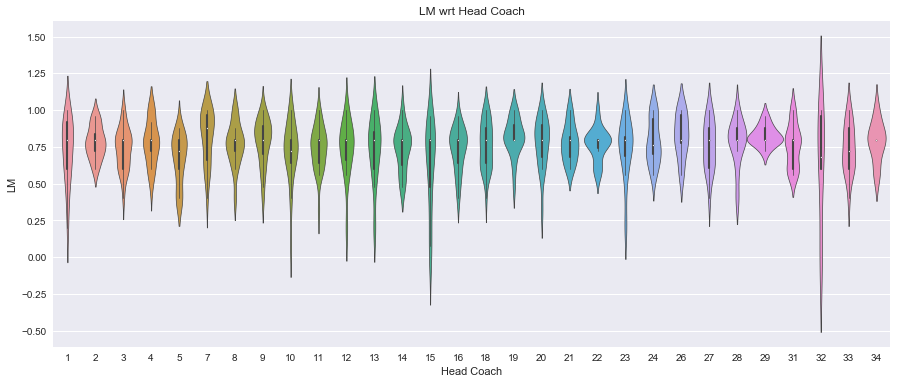

In [85]:
plt.figure(figsize=(15,6))
sns.violinplot(data=ds2, x='Head Coach', y='LM', linewidth=0.7, width=1.3)
plt.title("LM wrt Head Coach")

Analysis:

Most median values of the LM distributions seem to focus around the LM = 0.75 for most Headcoaches. The distributions themselves are mostly spread out over the probability range with the exception of a few:

- Head Coach 32 with an almost uniform distribution
- Head Coach 29 with a tightly contained distribution centering around LM = 0.75

<h2>Plot feature “PQ” with respect to “Manager” and “Season”</h2>

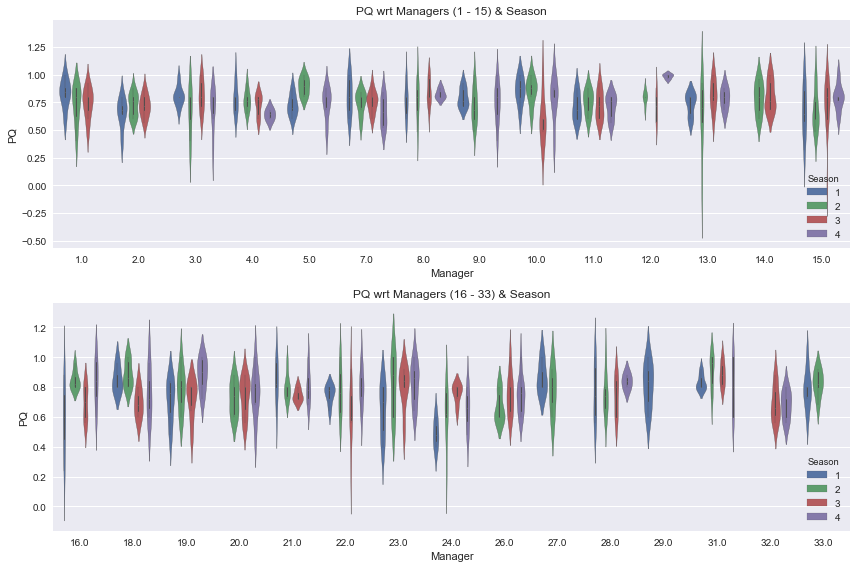

In [42]:
plt.figure(figsize=(12,8))

plt.subplot(211)
plt.title("PQ wrt Managers (1 - 15) & Season")
sns.violinplot(data=ds2[ds2.Manager < 16], x='Manager', y='PQ', hue='Season', linewidth = 0.3)

plt.subplot(212)
plt.title("PQ wrt Managers (16 - 33) & Season")
sns.violinplot(data=ds2[ds2.Manager > 15], x='Manager', y='PQ', hue='Season', linewidth = 0.3)

plt.tight_layout()

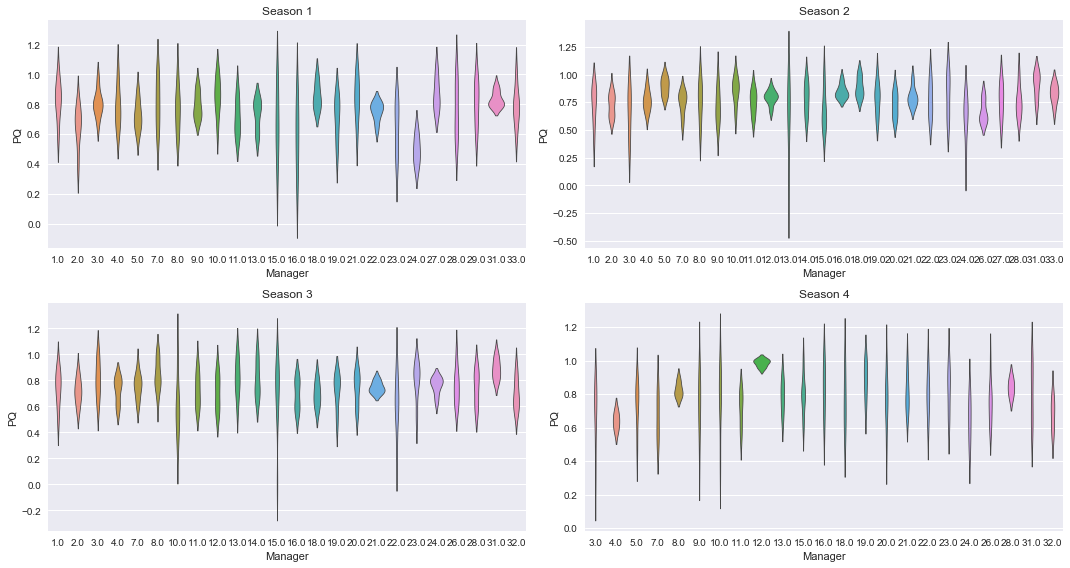

In [84]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==1], inner=None, linewidth=0.8)

plt.subplot(2,2,2)
plt.title("Season 2")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==2], inner=None, linewidth=0.8)

plt.subplot(2,2,3)
plt.title("Season 3")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==3], inner=None, linewidth=0.8)

plt.subplot(2,2,4)
plt.title("Season 4")
sns.violinplot(x='Manager', y='PQ', data=ds2[ds2.Season==4], inner=None, linewidth=0.8)

plt.tight_layout()

Analysis:

Most distributions are spread out throughout the Seasons, with the exception of a few, for Manager 21 in Season 3 and Manager 12 in Season 4 for example.

<h2>Plot feature “OO” with respect to “Head coach” and “Season”</h2> 

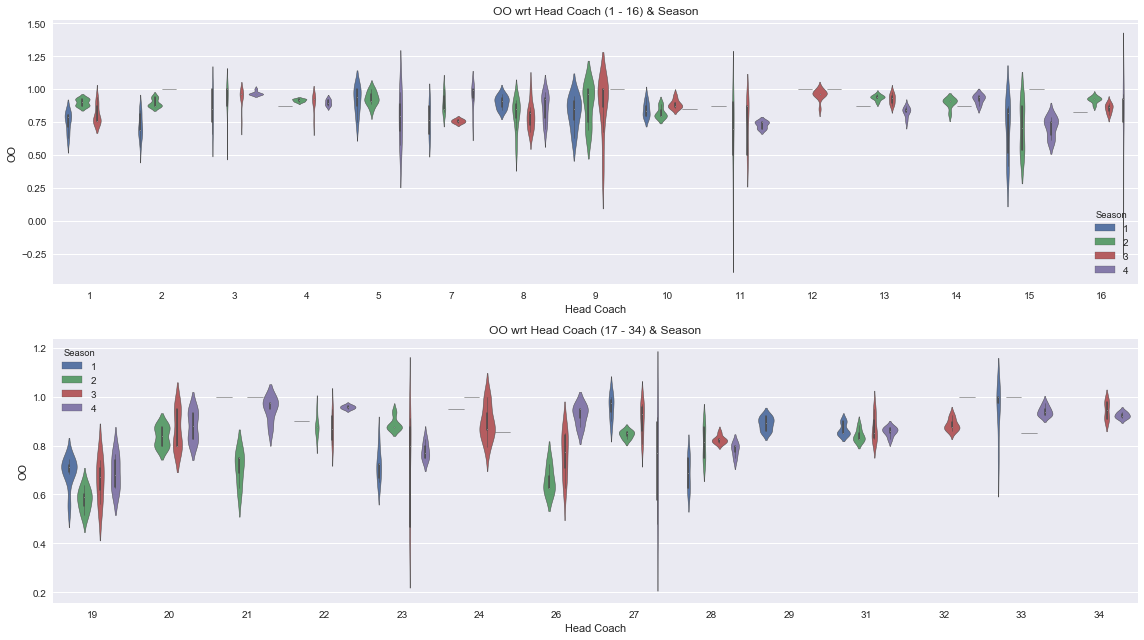

In [75]:
#Is there a better way to represent these?
plt.figure(figsize=(16,9))

plt.subplot(211)
plt.title("OO wrt Head Coach (1 - 16) & Season")
sns.violinplot(data=ds2[ds2['Head Coach'] < 17], x='Head Coach', y='OO', hue='Season', linewidth=0.5)

plt.subplot(212)
plt.title("OO wrt Head Coach (17 - 34) & Season")
sns.violinplot(data=ds2[ds2['Head Coach'] > 18], x='Head Coach', y='OO', hue='Season', linewidth=0.5)

plt.tight_layout()

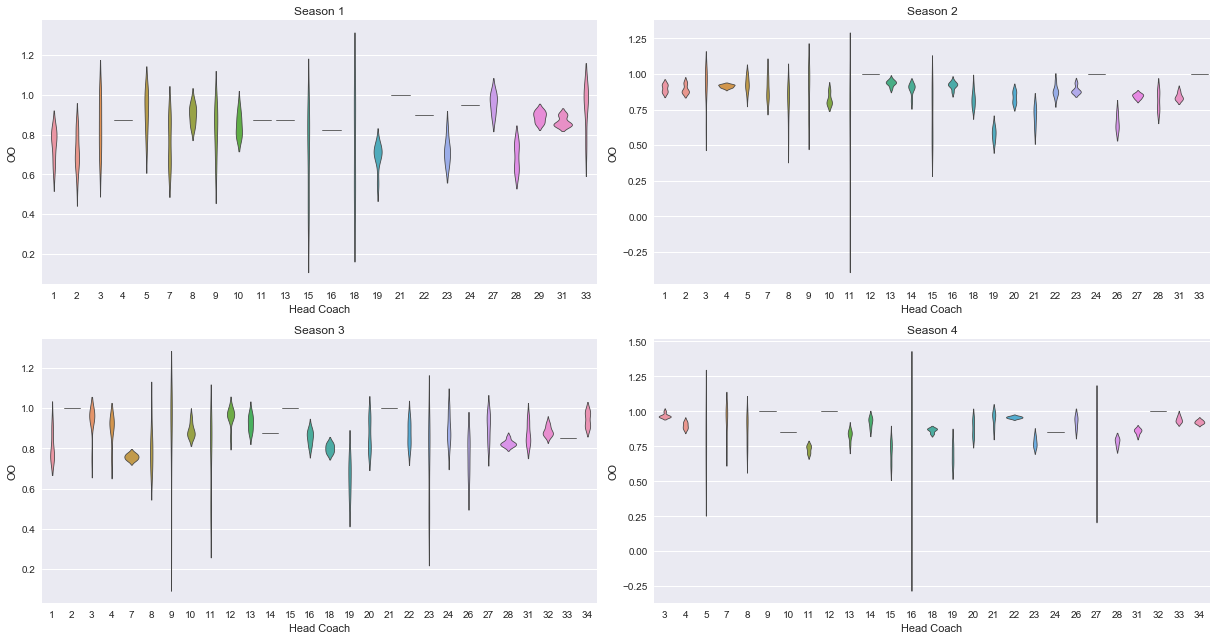

In [72]:
plt.figure(figsize=(17,9))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==1], inner=None, linewidth=0.8)

plt.subplot(2,2,2)
plt.title("Season 2")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==2], inner=None, linewidth=0.8)

plt.subplot(2,2,3)
plt.title("Season 3")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==3], inner=None, linewidth=0.8)

plt.subplot(2,2,4)
plt.title("Season 4")
sns.violinplot(x='Head Coach', y='OO', data=ds2[ds2.Season==4], inner=None, linewidth=0.8)

plt.tight_layout()

Analysis:
    
There is no unifying trend when it comes to the OO values for the different Head Coaches, some distributions are almost uniform (Head Coach 16 in Season 4) while others are horizontal lines, signifying one value of OO for a certain Head Coach (Head Coaches 5, 11, 13 .. in Season 1).

<h2>Plot feature “BC” with respect to “LM” and “Season”</h2>

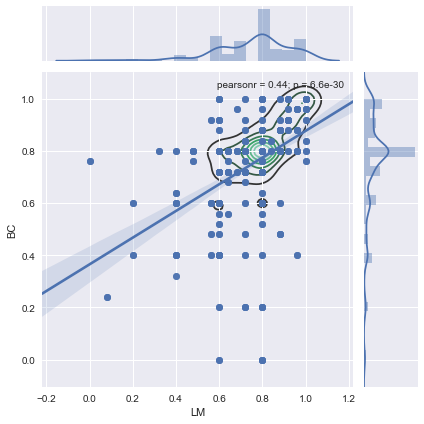

In [60]:
(sns.jointplot(data=ds2, x='LM', y='BC', kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=8)

Analysis:

Moderate correlation between BC & LM.

Most of data is aggregated around values of LM (0.6 - 1.0) and BC (0.7 - 1.0).

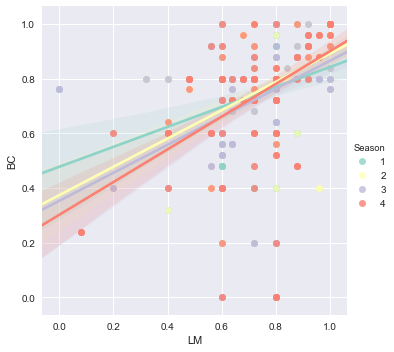

In [83]:
# Need help with analysis here
sns.lmplot(x='LM', y='BC', data=ds2, hue='Season', palette='Set3')

Analysis:

All BC regression plots indicate a moderate positive correlation with the LM feature, with varying slopes and intercepts.

<h2>Plot feature “LM” with respect to “HH” and “Season”</h2>

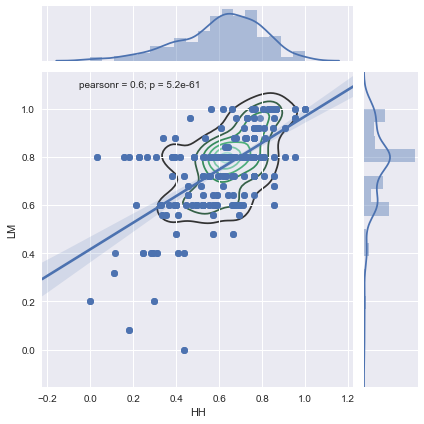

In [81]:
(sns.jointplot(data=ds2, x='HH', y='LM', kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

Analysis:

r = 0.6, high correlation between LM & HH.

Most values are focused between HH = (0.4, 1.0) and LM = (0.5, 1.0).

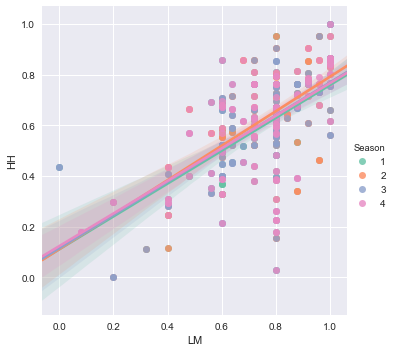

In [82]:
sns.lmplot(x='LM', y='HH', data=ds2, hue='Season', palette='Set2')

Analysis:

The regression lines evolve in almost the same manner throughout the Seasons with similar slopes and intercepts. Therefore HH varies in the same way with respect to LM for every season.

Therefore, HH is highly correlated to LM in all seasons.

<h2>Plot feature “EF” with respect to “League/Division” and “Season” for the data instances without missing values in the “League/Division” feature</h2>

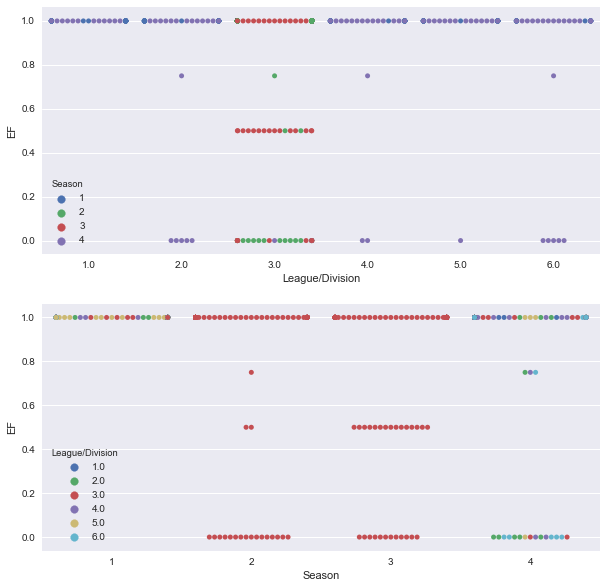

In [79]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.swarmplot(x='League/Division', y='EF', data=ds2, hue='Season')
plt.subplot(212)
sns.swarmplot(x='Season', y='EF', data=ds2, hue='League/Division')

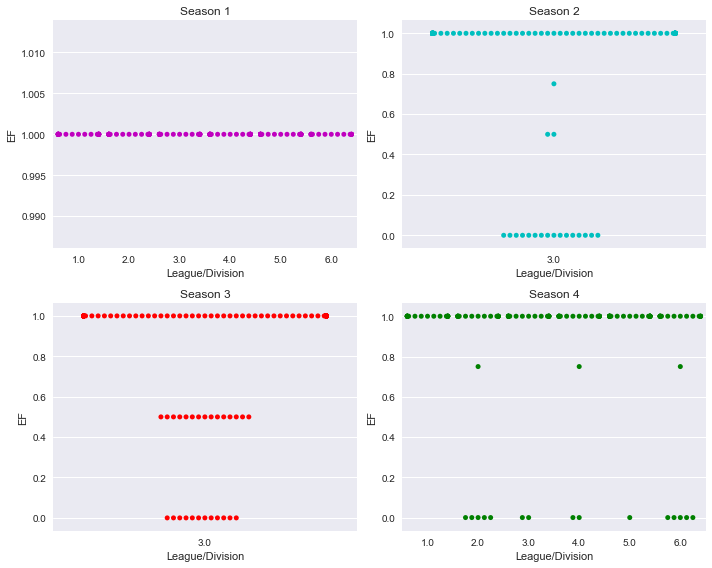

In [80]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Season 1")
sns.swarmplot(data=ds2[ds2.Season==1], x='League/Division', y='EF', color='m')

plt.subplot(2,2,2)
plt.title("Season 2")
sns.swarmplot(data=ds2[ds2.Season==2], x='League/Division', y='EF', color='c')

plt.subplot(2,2,3)
plt.title("Season 3")
sns.swarmplot(data=ds2[ds2.Season==3], x='League/Division', y='EF', color='r')

plt.subplot(2,2,4)
plt.title("Season 4")
sns.swarmplot(data=ds2[ds2.Season==4], x='League/Division', y='EF', color='g')

plt.tight_layout()

Analysis:

We have 4 possible values of EF:  0, 0.5, 0.75 and 1 for all different seasons.

For Season 2 and 3 we only have values for League/Division 3. Most atheletes have EF of either 0 or 1. From season 2 to 3, the number of players with EF of 0.5 has greatly increased.

For Season 1, the only performance metric is of 1, for all different Leagues.

For Season 4, all leagues have varying values of EF, mostly concentrated at EF = 1.0, and less so at EF = 0.0.

<h1>Prediction</h1>

In [86]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.svm import SVR

In [87]:
#Different regressor instances
regressors = [
    linear_model.LinearRegression(),
    linear_model.HuberRegressor(),
    linear_model.BayesianRidge(normalize=True),
    linear_model.Lasso(alpha=1e-4),
    linear_model.LassoLarsIC(),
    linear_model.Ridge(),
    SVR(kernel='linear'),
]

In [88]:
# Method 1 (This method is better)
def predictor1(regressors, X, y):
    cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.25, train_size=0.75, random_state=42)
    results1 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score'])
    index = 0
    for reg in regressors:
        cv_results1 = model_selection.cross_validate(reg, X, y, cv = cv_split)
        results1.loc[index, 'Name'] = reg.__class__.__name__
        results1.loc[index, 'Train Score'] = cv_results1['train_score'].mean()
        results1.loc[index, 'Test Score'] = cv_results1['test_score'].mean()
        index = index + 1
    return results1

In [89]:
# Method 2 (This could be improved upon, method taken from datacamp scikit course)
def predictor2(regressors, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    results2 = pd.DataFrame(columns=['Name', 'Train Score', 'Test Score'])
    index2 = 0

    for reg in regressors:
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)

    
        results2.loc[index2, 'Name'] = reg.__class__.__name__
        results2.loc[index2, 'Train Score'] = cross_val_score(reg, X_train, y_train, 
                                                              scoring='neg_mean_squared_error', cv=10).mean()
        results2.loc[index2, 'Test Score'] = cross_val_score(reg, X_test, y_test, 
                                                             scoring='neg_mean_squared_error', cv=10).mean()
        # results2.loc[index2, 'RMSE'] = rmse

        index2 = index2 + 1
        
    return results2

<h2>Predict feature “OO” given “Head coach”, “PQ”, “EF”, “J”, and “LM”.</h2>

In [91]:
X1 = ds2[['Head Coach','PQ','EF','J','LM']]
y1 = ds2['OO']

table11 = predictor1(regressors, X1, y1)
table21 = predictor2(regressors, X1, y1)

In [102]:
table11

,Name,Train Score,Test Score
0,LinearRegression,0.372555,0.338676
1,HuberRegressor,0.364277,0.328748
2,BayesianRidge,0.372418,0.339047
3,Lasso,0.372536,0.338781
4,LassoLarsIC,0.370227,0.33851
5,Ridge,0.371224,0.339526
6,SVR,0.370333,0.335951


In [93]:
table21

,Name,Train Score,Test Score
0,LinearRegression,-0.0149654,-0.0184815
1,HuberRegressor,-0.0152195,-0.0187343
2,BayesianRidge,-0.0149255,-0.0180222
3,Lasso,-0.0149268,-0.0184128
4,LassoLarsIC,-0.0148193,-0.0183642
5,Ridge,-0.014926,-0.0181541
6,SVR,-0.0149757,-0.0181039


<h2>Predict feature “LM” given “Head coach”, “NN”, “HH”, and “BC”.</h2>

In [95]:
X2 = ds2[['Head Coach','NN','HH','BC']]
y2 = ds2['LM']

table12 = predictor1(regressors, X2, y2)
table22 = predictor2(regressors, X2, y2)

In [96]:
table12

,Name,Train Score,Test Score
0,LinearRegression,0.372555,0.338676
1,HuberRegressor,0.364277,0.328748
2,BayesianRidge,0.372418,0.339047
3,Lasso,0.372536,0.338781
4,LassoLarsIC,0.370227,0.33851
5,Ridge,0.371224,0.339526
6,SVR,0.370333,0.335951


In [97]:
table22

,Name,Train Score,Test Score
0,LinearRegression,-0.0194544,-0.0216542
1,HuberRegressor,-0.0197122,-0.0222394
2,BayesianRidge,-0.0194375,-0.0216385
3,Lasso,-0.0194531,-0.0216189
4,LassoLarsIC,-0.0192883,-0.0209421
5,Ridge,-0.0194405,-0.0216511
6,SVR,-0.0193929,-0.0215067


<h2>Predict feature “PQ” given “NN”, and “BC”.</h2>

In [98]:
X3 = ds2[['NN', 'BC']]
y3 = ds2['PQ']

table13 = predictor1(regressors, X3, y3)
table23 = predictor2(regressors, X3, y3)

In [99]:
table13

,Name,Train Score,Test Score
0,LinearRegression,0.171784,0.143261
1,HuberRegressor,0.160401,0.127998
2,BayesianRidge,0.171703,0.143768
3,Lasso,0.171764,0.143873
4,LassoLarsIC,0.171083,0.146455
5,Ridge,0.171322,0.145113
6,SVR,0.167889,0.138761


In [100]:
table23

,Name,Train Score,Test Score
0,LinearRegression,-0.0178874,-0.0262219
1,HuberRegressor,-0.0182099,-0.0266072
2,BayesianRidge,-0.0178912,-0.0262358
3,Lasso,-0.0178791,-0.0262083
4,LassoLarsIC,-0.0178277,-0.0260112
5,Ridge,-0.0178756,-0.0261772
6,SVR,-0.0178588,-0.026241


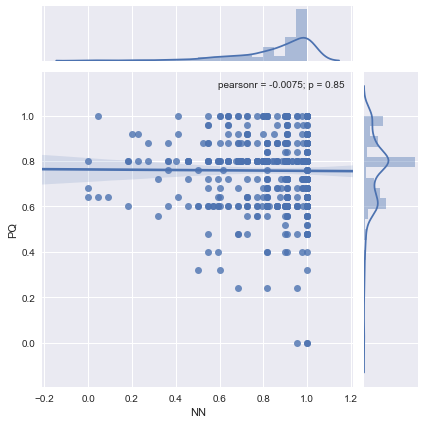

In [104]:
sns.jointplot(data=ds2, x='NN', y='PQ', kind='reg')

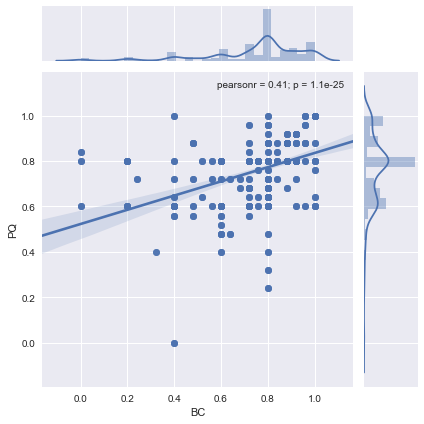

In [105]:
sns.jointplot(data=ds2, x='BC', y='PQ', kind='reg')